# Power curve of different biceps exercises 
In the following we will have to calculate the torque and graph it with respect to the angle in the elbow.
The formula of torque: torque = r * F * sin(theta)

First we code the **imports.**

In [1]:
# Important math functions and the constant pi:
from math import sin, cos, sqrt, pi, atan

# We will start using the high-performance numpy library for dealing with arrays of floats:
import numpy as np

# The following import statement makes the plotting library available to us. There is also a mysterious
# statement beginning with % to work around a known Jupyter bug: https://github.com/jupyter/notebook/issues/3670
%matplotlib inline
import matplotlib.pyplot as plt

# Use unit testing framework to test each function we write:
import unittest

# Recreating of Torque Curve of the human biceps (all muscles that are responsible for flexing the elbow) based on human anatomy


![](Anatomy.png)


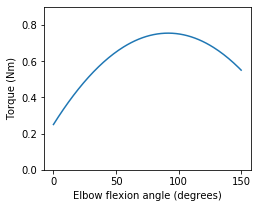

In [2]:
a = -0.00006
b = 0.011
c = 0.25

thetasA = np.zeros((151,))
torquesA = np.zeros((151,))

for i in range(0, 151):
    thetasA[i] = i
    torquesA[i] = a * thetasA[i]**2 + b * thetasA[i] + c

plt.figure(figsize = (3.7,3))
plt.plot(thetasA, torquesA)
plt.xlabel("Elbow flexion angle (degrees)")
plt.ylabel("Torque (Nm)")

plt.ylim(0.0,0.9)

plt.show()

## Define function we are going to use through out the entire notebook

In [3]:
def angle_in_radians(angle_in_degrees):
    # this function converts the unit of an angle from degrees to radians
    return angle_in_degrees * pi / 180

def changing_angle(simulation_theta_steps,x_positions ,y_positions):
    alphas = np.zeros((simulation_theta_steps,))
    for i in range(0, simulation_theta_steps):
        alpha_radians = atan(y_positions[i] / x_positions[i])
        alphas[i] = alpha_radians / pi * 180
    return alphas


### Unit tests ###

class FunctionTests(unittest.TestCase):

    # tests of angle convertion to radians
    def test_angle_in_radians(self):
        angle_in_d = 180
        angle_in_r = angle_in_radians(angle_in_d)
        self.assertAlmostEqual(angle_in_r, pi)
        

testSuite = unittest.TestLoader().loadTestsFromName("__main__.FunctionTests")
testRunner = unittest.TextTestRunner(verbosity=2)
testRunner.run(testSuite)

test_angle_in_radians (__main__.FunctionTests) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.012s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

Next, define all the **constants**. All of the constants are in meters.

In [4]:
# The following two parameters are get us the strength of gravity:
g = 9.81      # 9.81 m/s**2 at Earth surface
m = 1         # mass of dumb bell in kg 

#BUT instead of calculating a force we are just using a defined force
#Also force is never changing throughout the four exercises ONLY direction changes
force = 1.8854 #make the force a dummy variable #ADAPTED SO ALL GRAPHS ARE INLINE WITH GIVEN GRAPH

# The following two variables define the torque:
radius = 0.4         # 40 cm length of lower arm

# The following two parameters establish the simulation angle step and its maximum total angle:
delta_theta = 0.1    # simulation theta step in degrees
final_theta = 150    # max bend arm is 150 degrees given by human anatomy  

# Exercise 1 - Biceps curls with dumb bells (standing)
For the first exercise we need following additional constants.

![](One.jpg)

In [5]:
initial_theta = 0.0    # starting angle 0 degrees means fully extended arm

# Calculate theta steps based on initial theta  
simulation_theta_steps = round((final_theta - initial_theta) / delta_theta)  # amount of totals simulation steps

## The While Loop That Does the Work


In [6]:
# Initialize the torques and thetas
torques1 = np.zeros((simulation_theta_steps,))
thetas1 = np.zeros((simulation_theta_steps,))

for i in range(0, simulation_theta_steps):
    thetas1[i] = initial_theta + i * delta_theta
    torques1[i] = radius * force * sin(angle_in_radians(thetas1[i]))

## Diagram 1


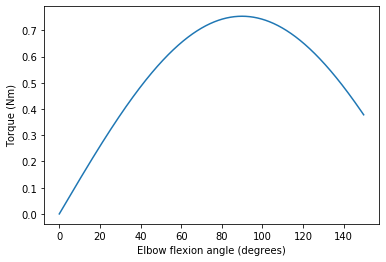

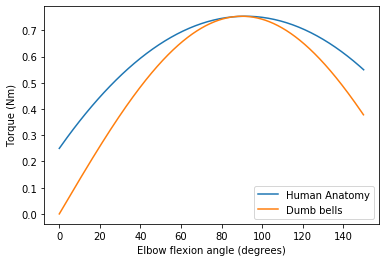

In [7]:
plt.plot(thetas1, torques1)

plt.xlabel("Elbow flexion angle (degrees)")
plt.ylabel("Torque (Nm)")

plt.show()

#Compared to Anatomy
plt.plot(thetasA, torquesA)
plt.plot(thetas1, torques1)

plt.xlabel("Elbow flexion angle (degrees)")
plt.ylabel("Torque (Nm)")
plt.legend(["Human Anatomy", "Dumb bells"])

plt.show()

# Exercise 2 -  Biceps curl facing cable tower (standing)
![](Two.jpg)
Additional constants

In [8]:
#NEW initial theta
initial_theta = 15.0    # starting angle 0 degrees means fully extended arm
# Calculate theta steps based on initial theta  
simulation_theta_steps = round((final_theta - initial_theta) / delta_theta)  # amount of totals simulation steps

#lets get all x and y positions of the hand during a full biceps curve facing the cable tower
initial_x = 0.5 # 0.5 meter distance from the person and the cable tower
initial_y = 0.8 # in full extension hand is 80 cm above the ground
height_of_center = initial_y + radius #height of the center of the circle around which the hand will move

## Getting the x and y positions

In [9]:
#create x and y positions and thetas
x_positions = np.zeros((simulation_theta_steps,))
y_positions = np.zeros((simulation_theta_steps,))
thetas2 = np.zeros((simulation_theta_steps,))

for i in range(0, simulation_theta_steps):
    thetas2[i] = initial_theta + i * delta_theta
    x_positions[i] = initial_x - radius * sin(angle_in_radians(thetas2[i]))
    y_positions[i] = initial_y + (radius - radius * cos(angle_in_radians(thetas2[i])))

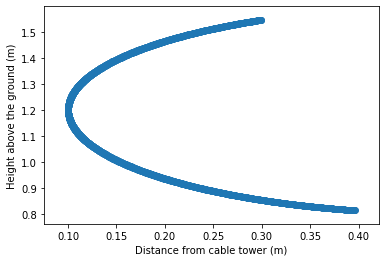

In [10]:
plt.scatter(x_positions, y_positions)

plt.xlabel("Distance from cable tower (m)")
plt.ylabel("Height above the ground (m)")

plt.show()

Since at this exercise the rope is connected to the bottom of the cable tower (pretty much at the ground). Therefore, Height above the ground = Height above the fixation of the rope 

## Calculating the new angle

Since we are using the cable tower we have to calculate a new angle. The force isn't pointed downwards anymore; moreover, it's always pointed to the fixation of the cable tower.

We have to find alpha from the calculated x and y positions

In [11]:
alphas = thetas2 - (90 - changing_angle(simulation_theta_steps,x_positions ,y_positions))

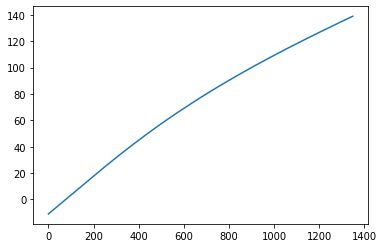

In [12]:
plt.plot(alphas)

plt.show()

## The While Loop That Does the Work using the new force


In [13]:
# Initialize the torques 
torques2 = np.zeros((simulation_theta_steps,))

for i in range(0, simulation_theta_steps):
    torques2[i] = radius * force * sin(angle_in_radians(alphas[i]))

## Diagram 2

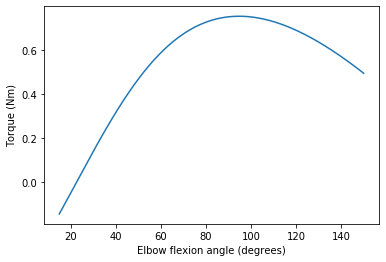

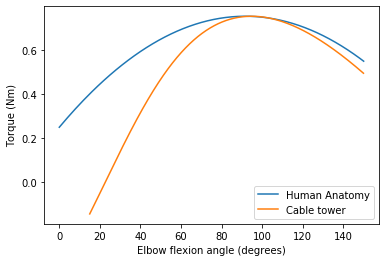

In [14]:
plt.plot(thetas2, torques2)

plt.xlabel("Elbow flexion angle (degrees)")
plt.ylabel("Torque (Nm)")

plt.show()

#Compared to Anatomy
plt.plot(thetasA, torquesA)
plt.plot(thetas2, torques2)

plt.xlabel("Elbow flexion angle (degrees)")
plt.ylabel("Torque (Nm)")
plt.legend(["Human Anatomy", "Cable tower",])

plt.show()

# Exercise 3 - Biceps curl 90 degrees towards the cable tower horizontal starting position (standing)
![](Three.jpg)
new initial conditions

In [15]:
#NEW initial theta
initial_theta = 0.0    # starting angle 0 degrees means fully extended arm
# Calculate theta steps based on initial theta  
simulation_theta_steps = round((final_theta - initial_theta) / delta_theta)  # amount of totals simulation steps

#lets get all x and y positions of the hand during a full biceps curve standing sideways to the cable tower
initial_x = 1.0 # 1.0 meter distance from the person and the cable tower
initial_y = 1.6 # in full extension and horizontal position hand is 160 cm above the ground (on shoulder height)
height_of_center = initial_y #height of the center of rotation (elbow) of the circle around which the hand will move

## Getting the x and y positions

In [16]:
#create x and y positions and thetas
x_positions = np.zeros((simulation_theta_steps,))
y_positions = np.zeros((simulation_theta_steps,))
thetas3 = np.zeros((simulation_theta_steps,))
                                  
for i in range(0, simulation_theta_steps):
    thetas3[i] = initial_theta + i * delta_theta
    theta_radians = angle_in_radians(thetas3[i])
    x_positions[i] = initial_x + (radius - radius * cos(theta_radians))
    y_positions[i] = initial_y + radius * sin(theta_radians)

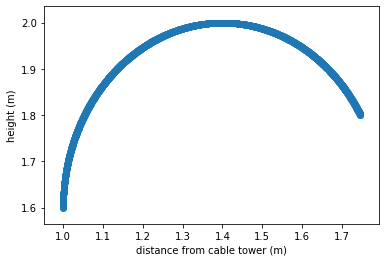

In [17]:
plt.scatter(x_positions, y_positions)

plt.xlabel("distance from cable tower (m)")
plt.ylabel("height (m)")


plt.show()

Since the rope at the cable tower is supposed to be set on a height of the initial y position we have to adapt the y position by subtracting the initial y position from it

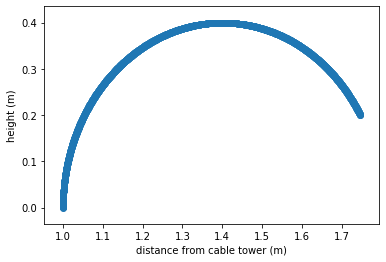

In [18]:
y_positions = y_positions - initial_y

plt.scatter(x_positions, y_positions)

plt.xlabel("distance from cable tower (m)")
plt.ylabel("height (m)")


plt.show()

## Calculating the angle
Our new force will be F = F * cos(alpha). 

We have to find alpha from the x and y positions

<function matplotlib.pyplot.show(*args, **kw)>

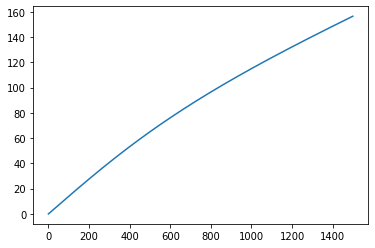

In [19]:
alphas = thetas3 + changing_angle(simulation_theta_steps,x_positions,y_positions)

plt.plot(alphas)
plt.show

## The While Loop That Does the Work using the new force

In [20]:
# Initialize the torques
torques3 = np.zeros((simulation_theta_steps,))

for i in range(0, simulation_theta_steps):
    torques3[i] = radius * force * sin(angle_in_radians(alphas[i]))

## Diagram 3

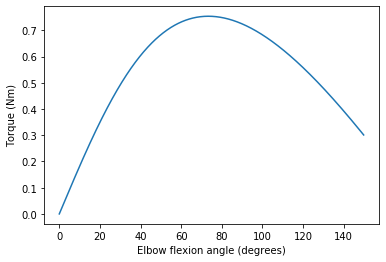

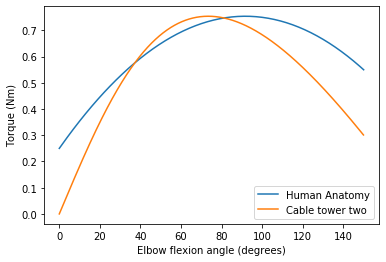

In [21]:
plt.plot(thetas3, torques3)

plt.xlabel("Elbow flexion angle (degrees)")
plt.ylabel("Torque (Nm)")

plt.show()

#Compared to Anatomy
plt.plot(thetasA, torquesA)
plt.plot(thetas3, torques3)

plt.xlabel("Elbow flexion angle (degrees)")
plt.ylabel("Torque (Nm)")
plt.legend(["Human Anatomy", "Cable tower two"])

plt.show()

# Exercise 4 - Biceps curl with arm rest at certain degree (sitting)
![](Four.jpg)
new initial conditions

In [22]:
#NEW initial theta
initial_theta = 0.0    # starting angle 0 degrees means fully extended arm
# Calculate theta steps based on initial theta  
simulation_theta_steps = round((final_theta - initial_theta) / delta_theta)  # amount of totals simulation steps

gamma = 15 #degrees of arm rest

## The While Loop That Does the Work

In [23]:
# Initialize the torques4 and thetas
torques4 = np.zeros((simulation_theta_steps,))
thetas4 = np.zeros((simulation_theta_steps,))

for i in range(0, simulation_theta_steps):
    thetas4[i] = initial_theta + i * delta_theta  
    torques4[i] = radius * force * sin(angle_in_radians(thetas4[i] + gamma))  

## Diagram 4

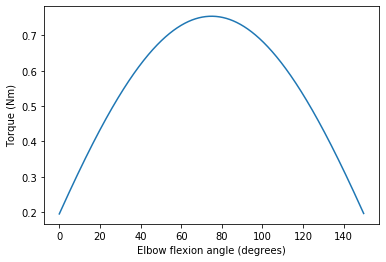

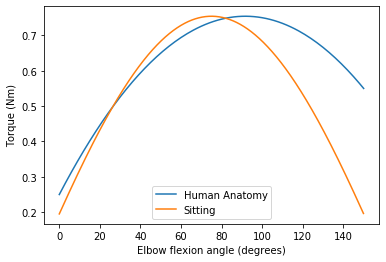

In [24]:
plt.plot(thetas4, torques4)

plt.xlabel("Elbow flexion angle (degrees)")
plt.ylabel("Torque (Nm)")

plt.show()

#Compared to Anatomy
plt.plot(thetasA, torquesA)
plt.plot(thetas4, torques4)

plt.xlabel("Elbow flexion angle (degrees)")
plt.ylabel("Torque (Nm)")
plt.legend(["Human Anatomy", "Sitting"])

plt.show()

# Compare all graphs

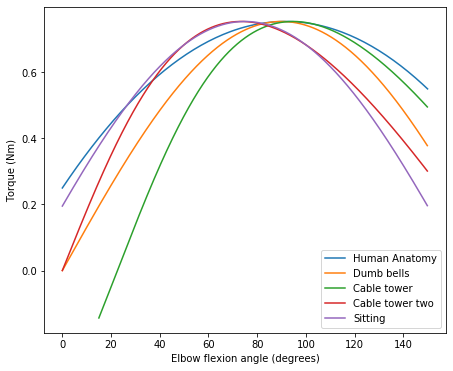

In [25]:
plt.figure(figsize = (7.2,6))
plt.plot(thetasA, torquesA)
plt.plot(thetas1, torques1)
plt.plot(thetas2, torques2)
plt.plot(thetas3, torques3)
plt.plot(thetas4, torques4)

plt.xlabel("Elbow flexion angle (degrees)")
plt.ylabel("Torque (Nm)")
plt.legend(["Human Anatomy", "Dumb bells", "Cable tower", "Cable tower two", "Sitting"])

plt.show()

# Conclusion

As shown in the last Diagram all exercises are quite different and it is hard to say which one is best!
In general the curves show that using one of those four exercises you have to decide beforehand whether you want to have a strong performance at low or at high degrees of elbow flexion. No matter which one you choose to focus on, the exercise is going to perform pourly in the other regard. 

We think that those four exercises could be very effective if you **combine them correcly**. 

EXAMPLE:
If a normal workout would include 6 sets of bizeps for example and you train your biceps twice a weeek, you could use following strategy:

**Day 1:** 4 sets of Exercise 2 (Cable tower) + 2 sets of Exercise 4 (sitting)

**Day 2:** 4 sets of Exercise 4 (sitting) + 2 sets of Exercise 2 (Cable tower)